In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
raw = pd.read_csv("PLS_FY2014_AE_pupld14a1.csv")

## Original Data

In [78]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301 entries, 0 to 9300
Columns: 161 entries, STABR to YR_SUB
dtypes: float64(10), int64(63), object(88)
memory usage: 11.4+ MB


In [79]:
#variables to use in the model
to_use = ['TOTCIR', 'POPU_LSA', 'STINCOME', 'BKVOL', 'EBOOK', 'STGVT', 'FEDGVT', 'LOCGVT', 'TOTSTAFF', 'GEOCODE', 'OBEREG', 'LOCALE']
to_use_df = raw[to_use]
to_use_df.head()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,GEOCODE,OBEREG,LOCALE
0,11607,2059,71829,16843,0,18993,2821,0,0.68,CI1,8,43
1,1886620,300549,71829,481861,9773,56724,157386,10448481,78.90,MA1,8,11
2,1092,209,71829,15304,0,6300,0,1000,0.50,CI1,8,43
3,12347,6241,71829,34115,165,6600,0,67600,3.00,CI1,8,33
4,59630,12793,71829,23810,9773,6600,4979,339574,3.00,CO1,8,42


In [80]:
to_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301 entries, 0 to 9300
Data columns (total 12 columns):
TOTCIR      9301 non-null int64
POPU_LSA    9301 non-null int64
STINCOME    9301 non-null int64
BKVOL       9301 non-null int64
EBOOK       9301 non-null int64
STGVT       9301 non-null int64
FEDGVT      9301 non-null int64
LOCGVT      9301 non-null int64
TOTSTAFF    9301 non-null float64
GEOCODE     9301 non-null object
OBEREG      9301 non-null int64
LOCALE      9301 non-null object
dtypes: float64(1), int64(9), object(2)
memory usage: 872.0+ KB


In [81]:
to_use_df.describe()
# -3 and -1 are missing

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,OBEREG
count,9.301000e+03,9.301000e+03,9301.000000,9.301000e+03,9.301000e+03,9.301000e+03,9.301000e+03,9.301000e+03,9301.000000,9301.000000
mean,2.488169e+05,3.431926e+04,54220.708096,8.257958e+04,2.300205e+04,9.140132e+04,4.939996e+03,1.105699e+06,14.915302,3.724116
std,1.028185e+06,1.366025e+05,7976.629792,3.450647e+05,4.147891e+04,8.204179e+05,5.034192e+04,4.729539e+06,55.079062,1.975933
min,-3.000000e+00,-3.000000e+00,19686.000000,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000,1.000000
25%,1.147500e+04,2.189000e+03,48849.000000,1.427600e+04,3.500000e+01,2.150000e+02,0.000000e+00,4.330000e+04,1.330000,2.000000
50%,4.107100e+04,7.281000e+03,52716.000000,2.861100e+04,7.514000e+03,4.052000e+03,0.000000e+00,1.619790e+05,3.740000,3.000000
75%,1.434180e+05,2.278700e+04,58687.000000,6.664900e+04,2.099500e+04,2.142900e+04,0.000000e+00,6.534580e+05,10.750000,5.000000
max,2.410174e+07,4.008651e+06,74149.000000,2.206467e+07,1.036312e+06,3.561788e+07,2.950716e+06,1.430909e+08,2453.550000,9.000000


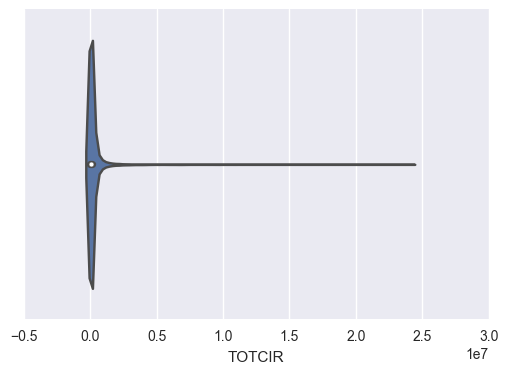

In [82]:
sns.violinplot(to_use_df['TOTCIR'])

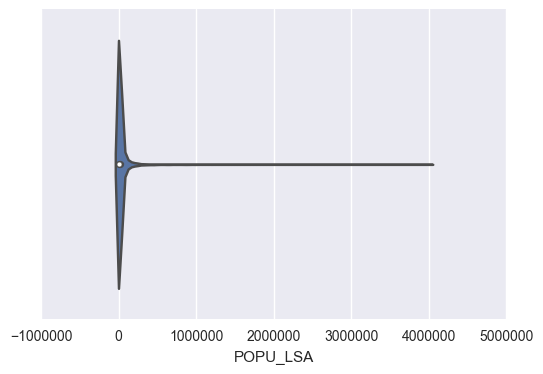

In [83]:
sns.violinplot(to_use_df['POPU_LSA'])

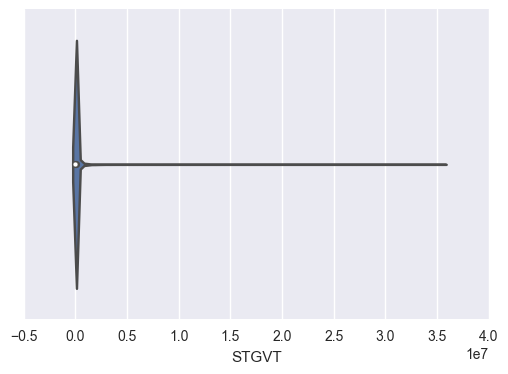

In [84]:
sns.violinplot(to_use_df['STGVT'])

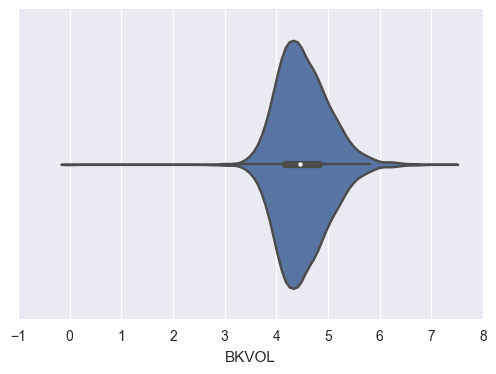

In [85]:
sns.violinplot(log_df['BKVOL'])

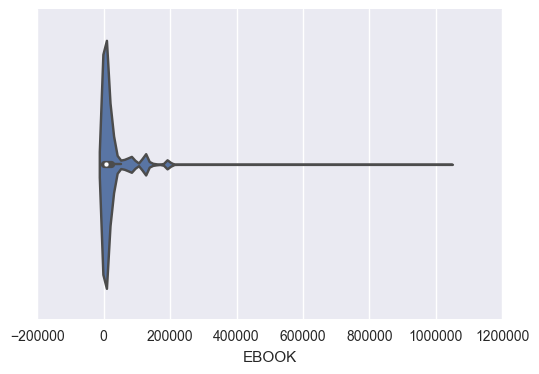

In [86]:
sns.violinplot(to_use_df['EBOOK'])

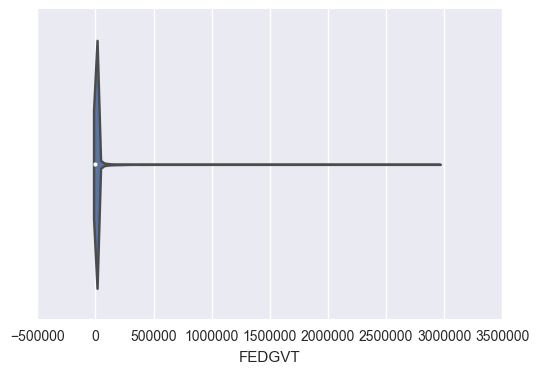

In [87]:
sns.violinplot(to_use_df['FEDGVT'])

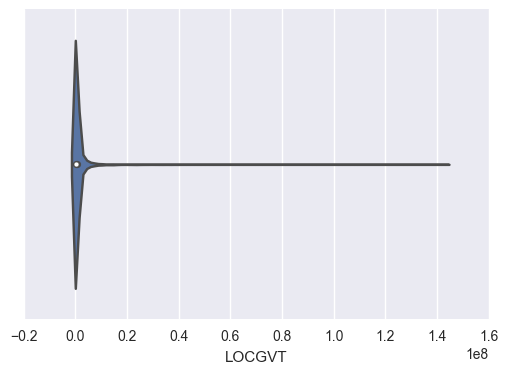

In [88]:
sns.violinplot(to_use_df['LOCGVT'])

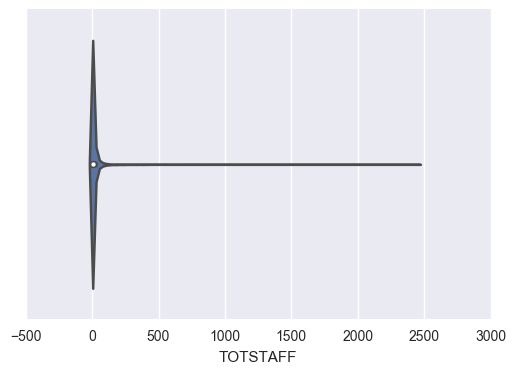

In [89]:
sns.violinplot(to_use_df['TOTSTAFF'])

In [90]:
to_use_df['GEOCODE'].value_counts()

CI1    3356
OTH    2148
CI2    1494
CO1    1129
CO2     508
SD1     423
MC1     129
SD2      52
MC2      41
MA1      11
MA2      10
Name: GEOCODE, dtype: int64

In [91]:
to_use_df['OBEREG'].value_counts()

3    1883
4    1620
2    1553
1    1288
5    1162
6     859
8     483
7     395
9      58
Name: OBEREG, dtype: int64

In [92]:
to_use_df['LOCALE'].value_counts()
#period is missing

42    2041
21    1881
43    1613
32    1057
33     643
41     505
31     502
13     296
22     258
23     206
12     117
.      106
11      76
Name: LOCALE, dtype: int64

In [93]:
to_use_df.corr()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,OBEREG
TOTCIR,1.000000,0.792648,0.028471,0.718872,0.254712,0.518032,0.403121,0.869215,0.875628,0.097726
POPU_LSA,0.792648,1.000000,-0.002005,0.750211,0.180103,0.426403,0.473719,0.849983,0.853125,0.129824
STINCOME,0.028471,-0.002005,1.000000,0.029396,-0.104549,-0.012486,0.016627,0.054373,0.030073,-0.398696
BKVOL,0.718872,0.750211,0.029396,1.000000,0.272441,0.577949,0.450178,0.795990,0.885733,0.050161
EBOOK,0.254712,0.180103,-0.104549,0.272441,1.000000,0.251783,0.086525,0.217690,0.270001,-0.053886
STGVT,0.518032,0.426403,-0.012486,0.577949,0.251783,1.000000,0.435368,0.396750,0.571897,-0.011884
FEDGVT,0.403121,0.473719,0.016627,0.450178,0.086525,0.435368,1.000000,0.471998,0.503974,0.046037
LOCGVT,0.869215,0.849983,0.054373,0.795990,0.217690,0.396750,0.471998,1.000000,0.943720,0.089025
TOTSTAFF,0.875628,0.853125,0.030073,0.885733,0.270001,0.571897,0.503974,0.943720,1.000000,0.075684
OBEREG,0.097726,0.129824,-0.398696,0.050161,-0.053886,-0.011884,0.046037,0.089025,0.075684,1.000000


## Impute Missing Data

In [94]:
temp_median = to_use_df['TOTCIR'].median()
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-3.0, value=temp_median)
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [95]:
temp_median = to_use_df['POPU_LSA'].median()
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-3.0, value=temp_median)
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [96]:
temp_median = to_use_df['STGVT'].median()
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-3.0, value=temp_median)
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [97]:
temp_median = to_use_df['BKVOL'].median()
to_use_df['BKVOL'] = to_use_df['BKVOL'].replace(to_replace=-3.0, value=temp_median)
to_use_df['BKVOL'] = to_use_df['BKVOL'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [98]:
temp_median = to_use_df['EBOOK'].median()
to_use_df['EBOOK'] = to_use_df['EBOOK'].replace(to_replace=-3.0, value=temp_median)
to_use_df['EBOOK'] = to_use_df['EBOOK'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [99]:
temp_median = to_use_df['FEDGVT'].median()
to_use_df['FEDGVT'] = to_use_df['FEDGVT'].replace(to_replace=-3.0, value=temp_median)
to_use_df['FEDGVT'] = to_use_df['FEDGVT'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [100]:
temp_median = to_use_df['LOCGVT'].median()
to_use_df['LOCGVT'] = to_use_df['LOCGVT'].replace(to_replace=-3.0, value=temp_median)
to_use_df['LOCGVT'] = to_use_df['LOCGVT'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [101]:
temp_median = to_use_df['TOTSTAFF'].median()
to_use_df['TOTSTAFF'] = to_use_df['TOTSTAFF'].replace(to_replace=-3.0, value=temp_median)
to_use_df['TOTSTAFF'] = to_use_df['TOTSTAFF'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [102]:
to_use_df.describe()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,OBEREG
count,9.301000e+03,9.301000e+03,9301.000000,9.301000e+03,9.301000e+03,9.301000e+03,9.301000e+03,9.301000e+03,9301.000000,9301.000000
mean,2.490554e+05,3.432709e+04,54220.708096,8.272109e+04,2.303599e+04,9.142703e+04,4.940004e+03,1.106674e+06,14.937327,3.724116
std,1.028132e+06,1.366007e+05,7976.629792,3.450367e+05,4.146314e+04,8.204151e+05,5.034192e+04,4.729328e+06,55.073508,1.975933
min,0.000000e+00,1.000000e+01,19686.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,1.191000e+04,2.195000e+03,48849.000000,1.450000e+04,4.800000e+01,3.250000e+02,0.000000e+00,4.509600e+04,1.350000,2.000000
50%,4.107100e+04,7.281000e+03,52716.000000,2.861100e+04,7.514000e+03,4.052000e+03,0.000000e+00,1.619790e+05,3.740000,3.000000
75%,1.434180e+05,2.278700e+04,58687.000000,6.664900e+04,2.099500e+04,2.142900e+04,0.000000e+00,6.534580e+05,10.750000,5.000000
max,2.410174e+07,4.008651e+06,74149.000000,2.206467e+07,1.036312e+06,3.561788e+07,2.950716e+06,1.430909e+08,2453.550000,9.000000


In [103]:
temp_mode = to_use_df['LOCALE'].mode()
print temp_mode

0    42
dtype: object


In [104]:
to_use_df['LOCALE'] = to_use_df['LOCALE'].replace(to_replace='.', value=42).astype(int)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [105]:
to_use_df['LOCALE'].value_counts()

42    2147
21    1881
43    1613
32    1057
33     643
41     505
31     502
13     296
22     258
23     206
12     117
11      76
Name: LOCALE, dtype: int64

## Transform continuous variables

In [106]:
to_use_df['CIR/POP'] = to_use_df['TOTCIR']/to_use_df['POPU_LSA']

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


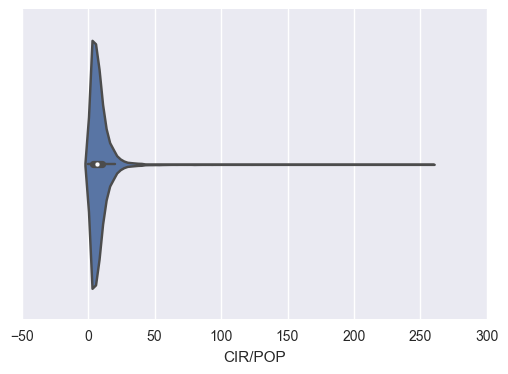

In [107]:
sns.violinplot(to_use_df['CIR/POP'])

In [108]:
log_columns = ['TOTCIR', 'POPU_LSA', 'BKVOL', 'EBOOK', 'STGVT', 'FEDGVT', 'LOCGVT', 'TOTSTAFF', 'CIR/POP']
log_df = to_use_df.copy()
log_df[log_columns] = log_df[log_columns].add(1)
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [109]:
log_df.head()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,GEOCODE,OBEREG,LOCALE,CIR/POP
0,4.064757,3.313867,71829,4.226445,0.000000,4.278616,3.450557,0.000000,0.225309,CI1,8,43,0.821985
1,6.275685,5.477917,71829,5.682923,3.990072,4.753775,5.196969,7.019053,1.902547,MA1,8,11,0.861967
2,3.038620,2.322219,71829,4.184833,0.000000,3.799409,0.000000,3.000434,0.176091,CI1,8,43,0.794131
3,4.091597,3.795324,71829,4.532958,2.220108,3.819610,0.000000,4.829953,0.602060,CI1,8,33,0.473978
4,4.775472,4.107006,71829,4.376778,3.990072,3.819610,3.697229,5.530936,0.602060,CO1,8,42,0.752904


In [110]:
log_df.describe()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,OBEREG,LOCALE,CIR/POP
count,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000
mean,4.617195,3.869640,54220.708096,4.513093,3.074495,3.085505,0.810111,5.181519,0.771174,3.724116,32.990646,0.848690
std,0.814615,0.728793,7976.629792,0.517199,1.827015,1.861611,1.527561,1.031503,0.509292,1.975933,9.837614,0.303978
min,0.000000,1.041393,19686.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000
25%,4.075948,3.341632,48849.000000,4.161398,1.690196,2.513218,0.000000,4.654148,0.371068,2.000000,21.000000,0.649697
50%,4.613546,3.862251,52716.000000,4.456548,3.875929,3.607777,0.000000,5.209461,0.675778,3.000000,33.000000,0.864793
75%,5.156607,4.357706,58687.000000,4.823800,4.322137,4.331022,0.000000,5.815218,1.070038,5.000000,42.000000,1.049222
max,7.382049,6.602998,74149.000000,7.343697,6.015491,7.551668,6.469928,8.155612,3.389972,9.000000,43.000000,2.413132


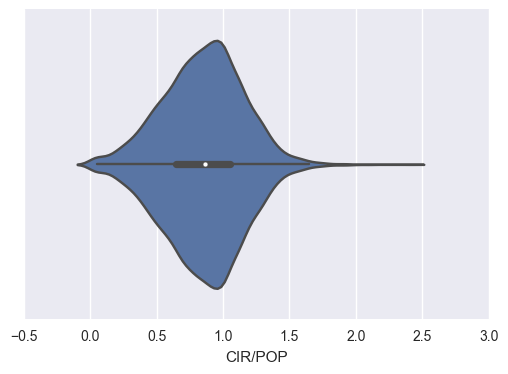

In [111]:
sns.violinplot(log_df['CIR/POP'])

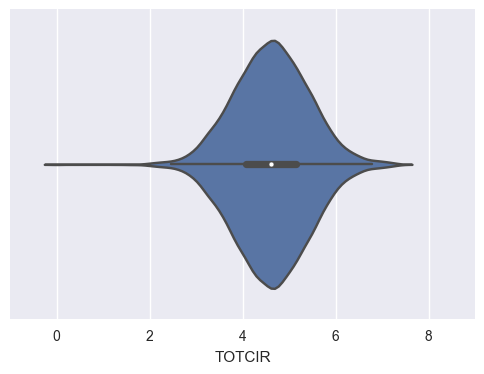

In [112]:
sns.violinplot(log_df['TOTCIR'])

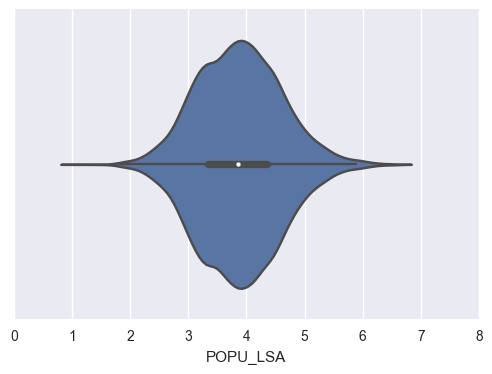

In [113]:
sns.violinplot(log_df['POPU_LSA'])

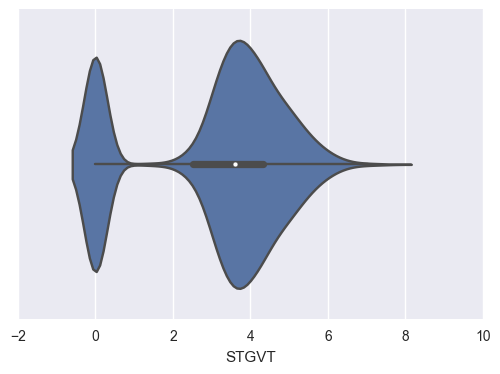

In [114]:
sns.violinplot(log_df['STGVT'])

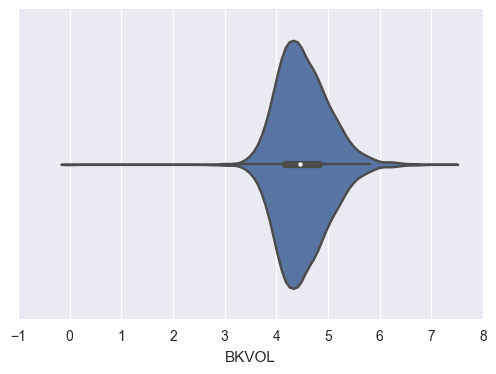

In [115]:
sns.violinplot(log_df['BKVOL'])

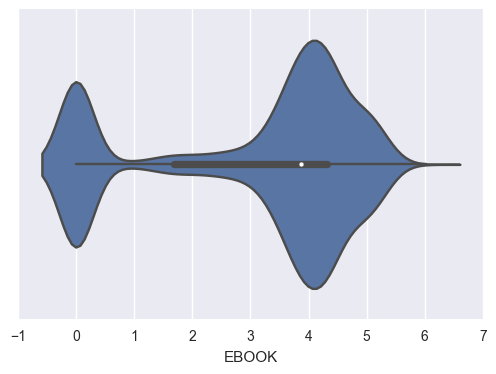

In [116]:
sns.violinplot(log_df['EBOOK'])

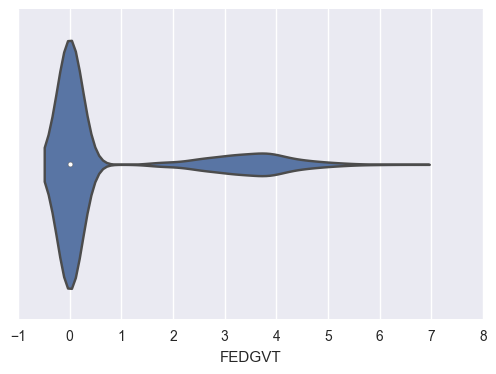

In [117]:
sns.violinplot(log_df['FEDGVT'])

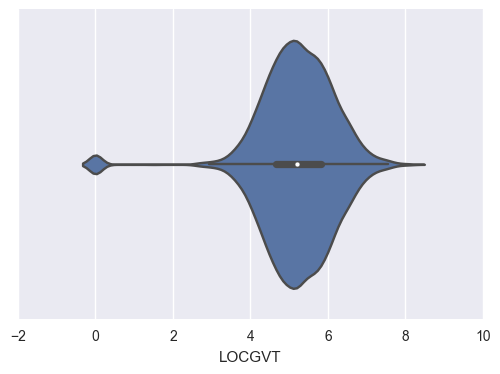

In [118]:
sns.violinplot(log_df['LOCGVT'])

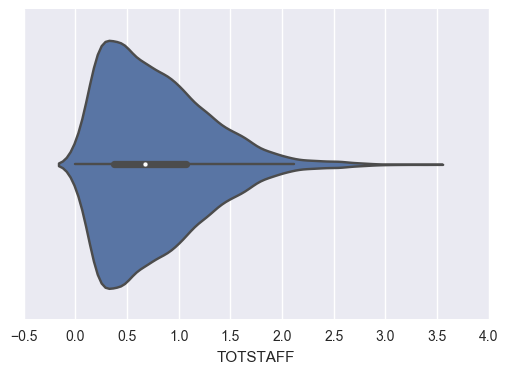

In [119]:
sns.violinplot(log_df['TOTSTAFF'])

## Get Dummy Variables

In [120]:
dummy_df = pd.get_dummies(log_df, columns=['GEOCODE', 'OBEREG', 'LOCALE'], drop_first=True)

In [121]:
dummy_df.head()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,CIR/POP,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
0,4.064757,3.313867,71829,4.226445,0.000000,4.278616,3.450557,0.000000,0.225309,0.821985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.275685,5.477917,71829,5.682923,3.990072,4.753775,5.196969,7.019053,1.902547,0.861967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.038620,2.322219,71829,4.184833,0.000000,3.799409,0.000000,3.000434,0.176091,0.794131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.091597,3.795324,71829,4.532958,2.220108,3.819610,0.000000,4.829953,0.602060,0.473978,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.775472,4.107006,71829,4.376778,3.990072,3.819610,3.697229,5.530936,0.602060,0.752904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
dummy_df.describe()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,CIR/POP,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
count,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,...,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000
mean,4.617195,3.869640,54220.708096,4.513093,3.074495,3.085505,0.810111,5.181519,0.771174,0.848690,...,0.031825,0.202236,0.027739,0.022148,0.053973,0.113644,0.069132,0.054295,0.230835,0.173422
std,0.814615,0.728793,7976.629792,0.517199,1.827015,1.861611,1.527561,1.031503,0.509292,0.303978,...,0.175542,0.401689,0.164233,0.147173,0.225976,0.317395,0.253693,0.226612,0.421390,0.378632
min,0.000000,1.041393,19686.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.075948,3.341632,48849.000000,4.161398,1.690196,2.513218,0.000000,4.654148,0.371068,0.649697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.613546,3.862251,52716.000000,4.456548,3.875929,3.607777,0.000000,5.209461,0.675778,0.864793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.156607,4.357706,58687.000000,4.823800,4.322137,4.331022,0.000000,5.815218,1.070038,1.049222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.382049,6.602998,74149.000000,7.343697,6.015491,7.551668,6.469928,8.155612,3.389972,2.413132,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
#correlation matrix
dummy_df.corr()

,TOTCIR,POPU_LSA,STINCOME,BKVOL,EBOOK,STGVT,FEDGVT,LOCGVT,TOTSTAFF,CIR/POP,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
TOTCIR,1.000000,0.860231,0.083326,0.891047,0.503630,0.378904,0.207205,0.730118,0.906437,0.426757,...,0.216181,0.358447,0.096348,0.035255,0.053037,0.076277,0.044125,-0.051190,-0.315383,-0.383669
POPU_LSA,0.860231,1.000000,-0.030646,0.856240,0.395765,0.339485,0.221930,0.696398,0.885725,-0.072266,...,0.228763,0.336176,0.104695,0.052410,0.052261,0.102911,0.058008,-0.052013,-0.308364,-0.429240
STINCOME,0.083326,-0.030646,1.000000,0.077319,0.095519,-0.002183,-0.050489,0.106621,0.051053,0.205875,...,-0.022107,0.252591,0.040801,-0.013233,-0.011471,-0.116226,-0.091256,0.085839,-0.061700,-0.084534
BKVOL,0.891047,0.856240,0.077319,1.000000,0.401088,0.389489,0.224479,0.697243,0.913923,0.220533,...,0.223360,0.333055,0.079773,0.029769,0.019862,0.060608,0.045805,-0.074314,-0.306939,-0.331909
EBOOK,0.503630,0.395765,0.095519,0.401088,1.000000,0.162356,0.039062,0.362961,0.425273,0.290216,...,0.075339,0.168684,0.042333,0.040096,0.050959,0.070701,-0.017925,0.013244,-0.114829,-0.239142
STGVT,0.378904,0.339485,-0.002183,0.389489,0.162356,1.000000,0.151837,0.236801,0.421573,0.139891,...,0.066992,0.211943,-0.010277,0.016557,0.018387,0.027051,-0.029753,-0.027270,-0.116269,-0.154619
FEDGVT,0.207205,0.221930,-0.050489,0.224479,0.039062,0.151837,1.000000,0.168968,0.244661,0.011093,...,0.071223,-0.040109,-0.010001,-0.001814,0.010736,0.048524,0.037438,-0.045965,-0.060300,-0.025175
LOCGVT,0.730118,0.696398,0.106621,0.697243,0.362961,0.236801,0.168968,1.000000,0.748182,0.199798,...,0.179534,0.344155,0.078465,0.010383,0.011767,0.011553,0.050772,-0.038724,-0.271761,-0.302300
TOTSTAFF,0.906437,0.885725,0.051053,0.913923,0.425273,0.421573,0.244661,0.748182,1.000000,0.226339,...,0.245900,0.371659,0.084460,0.026982,0.020391,0.042608,0.021005,-0.073044,-0.315484,-0.357084
CIR/POP,0.426757,-0.072266,0.205875,0.220533,0.290216,0.139891,0.011093,0.199798,0.226339,1.000000,...,0.032557,0.127544,0.003097,-0.022228,0.007355,-0.042932,-0.024100,-0.006079,-0.084614,0.006031


## Linear Regression

In [124]:
X = dummy_df.drop(['TOTCIR', 'POPU_LSA', 'CIR/POP'], axis=1)
y = dummy_df['CIR/POP']

In [125]:
import statsmodels.formula.api as smf

# statsmodel linear regression

lin_model = smf.OLS(endog=y, exog=X)
result = lin_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CIR/POP   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2945.
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        01:23:05   Log-Likelihood:                -508.32
No. Observations:                9301   AIC:                             1089.
Df Residuals:                    9265   BIC:                             1346.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
STINCOME     2.264e-06   4.75e-07      4.764      0.000      1.33e-06  3.19e-06
BKVOL           0.0234      0.009      2.561      0.010         0.006     0.041
EBOOK           0.0353      0.002     20.513      0.000         0.032     0.039
STGVT           0.0043      0.002      2.257      0.024         0.001     0.008
FEDGVT         -0.0013      0.002     -0.682      0.495        -0.005     0.002
LOCGVT          0.0097      0.004      2.400      0.016         0.002     0.018
TOTSTAFF        0.1935      0.014     13.659      0.000         0.166     0.221
GEOCODE_CI2     0.0031      0.009      0.352      0.725        -0.014     0.020
GEOCODE_CO1    -0.1697      0.011    -15.992      0.000        -0.190    -0.149
GEOCODE_CO2    -0.1936      0.013    -14.728      0.000        -0.219    -0.168
GEOCODE_MA1     0.0142      0.078      0.182      0.856        -0.138     0.167
GEOCODE_MA2    -0.0641      0.082     -0.786      0.432        -0.224     0.096
GEOCODE_MC1    -0.3293      0.025    -13.174      0.000        -0.378    -0.280
GEOCODE_MC2    -0.2719      0.041     -6.632      0.000        -0.352    -0.192
GEOCODE_OTH     0.0370      0.008      4.384      0.000         0.020     0.054
GEOCODE_SD1     0.0369      0.014      2.557      0.011         0.009     0.065
GEOCODE_SD2    -0.0803      0.036     -2.231      0.026        -0.151    -0.010
OBEREG_2       -0.0457      0.011     -4.219      0.000        -0.067    -0.024
OBEREG_3        0.0427      0.011      3.931      0.000         0.021     0.064
OBEREG_4        0.1274      0.011     11.394      0.000         0.105     0.149
OBEREG_5       -0.0931      0.014     -6.435      0.000        -0.121    -0.065
OBEREG_6       -0.0161      0.013     -1.221      0.222        -0.042     0.010
OBEREG_7        0.1182      0.016      7.332      0.000         0.087     0.150
OBEREG_8        0.0523      0.014      3.623      0.000         0.024     0.081
OBEREG_9       -0.4148      0.039    -10.641      0.000        -0.491    -0.338
LOCALE_12       0.0790      0.035      2.227      0.026         0.009     0.148
LOCALE_13       0.2186      0.030      7.169      0.000         0.159     0.278
LOCALE_21       0.2710      0.028      9.657      0.000         0.216     0.326
LOCALE_22       0.2778      0.032      8.759      0.000         0.216     0.340
LOCALE_23       0.2470      0.033      7.523      0.000         0.183     0.311
LOCALE_31       0.3016      0.030     10.062      0.000         0.243     0.360
LOCALE_32       0.2930      0.029     10.135      0.000         0.236     0.350
LOCALE_33       0.2950      0.030      9.930      0.000         0.237     0.353
LOCALE_41       0.3261      0.030     10.752      0.000         0.267     0.386
LOCALE_42       0.3370      0.029     11.673      0.000         0.280     0.394
LOCALE_43       0.4063      0.029     13.82

In [126]:
from sklearn.cross_validation import train_test_split
dummy_df = dummy_df.astype(float)
X, y = dummy_df.drop(['TOTCIR', 'POPU_LSA', 'CIR/POP'], axis=1).values, dummy_df.loc[:, 'CIR/POP'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
#sklearn linear regression
from sklearn import linear_model, metrics

lm=linear_model.LinearRegression().fit(X_train, y_train)
print lm.score(X_train, y_train)

0.293022535105


In [128]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print 'Train OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test OLS MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

lm = linear_model.Lasso().fit(X_train, y_train)
print 'Train Lasso MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test Lasso MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

lm = linear_model.Ridge().fit(X_train, y_train)
print 'Train Ridge MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test Ridge MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

Train OLS MSE:  0.0647914535886
Test OLS MSE: 0.0672726652242
Train Lasso MSE:  0.0879443787368
Test Lasso MSE: 0.0906298089218
Train Ridge MSE:  0.0648162793828
Test Ridge MSE: 0.0673232275052


In [129]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [130]:
from pprint import pprint
pprint(gs.grid_scores_ )

[mean: -0.06555, std: 0.00277, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -0.06558, std: 0.00288, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -0.06555, std: 0.00277, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -0.06558, std: 0.00288, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -0.06555, std: 0.00277, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -0.06558, std: 0.00288, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -0.06555, std: 0.00277, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -0.06558, std: 0.00288, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -0.06555, std: 0.00277, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -0.06558, std: 0.00288, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -0.06555, std: 0.00277, params: {'alpha': 1.0000000000000001e-05, 'fit_intercept': Tru

In [131]:
print gs.best_score_
print gs.best_estimator_
lrbestmodel=gs.best_estimator_

-0.0655454847247
Ridge(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


In [132]:
print lrbestmodel.coef_

[  2.96072494e-06   5.69641923e-02   3.62059066e-02   4.46508277e-03
  -7.47477884e-04   1.22036701e-02   1.60928398e-01   8.74178252e-03
  -1.67248410e-01  -1.89773480e-01   4.33384616e-02  -1.30721570e-02
  -3.40948553e-01  -2.84033602e-01   5.10370266e-02   5.06944063e-02
  -9.49292891e-02  -4.99902459e-02   4.79003402e-02   1.34286119e-01
  -7.39742871e-02   9.51551877e-03   1.20174602e-01   6.76007721e-02
  -3.74491224e-01   1.25240558e-01   2.67389084e-01   3.06736170e-01
   3.18859433e-01   3.00922049e-01   3.38841808e-01   3.35646373e-01
   3.43208544e-01   3.63448004e-01   3.79684874e-01   4.56683945e-01]


In [133]:
prediction = lrbestmodel.predict(X_test)

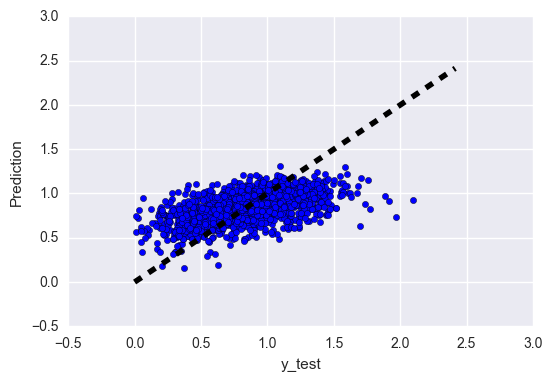

In [134]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y_test')
ax.set_ylabel('Prediction')
plt.show()

Prediction: DescribeResult(nobs=1861L, minmax=(0.15721985534489707, 1.3071293461803282), mean=0.85142496060871176, variance=0.026409481362803636, skewness=-0.43682456126596486, kurtosis=0.1895368855312327)
y_test: DescribeResult(nobs=1861L, minmax=(0.0098384532973182469, 2.0958017025375568), mean=0.85214808906249651, variance=0.095416217858548716, skewness=0.01845386289665569, kurtosis=0.02295662443024815)


0.9103459126756841

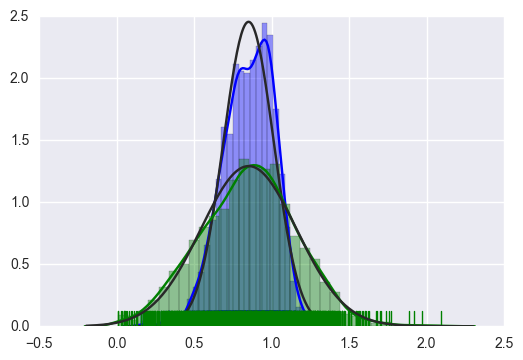

In [135]:
from scipy.stats import norm, normaltest, describe
sns.distplot(prediction, fit=norm, rug=True, color='b');
sns.distplot(y_test, fit=norm, rug=True, color='g');
print "Prediction:", describe(prediction)
stat, p = normaltest(prediction)
p

print "y_test:", describe(y_test)
stat, p = normaltest(y_test)
p

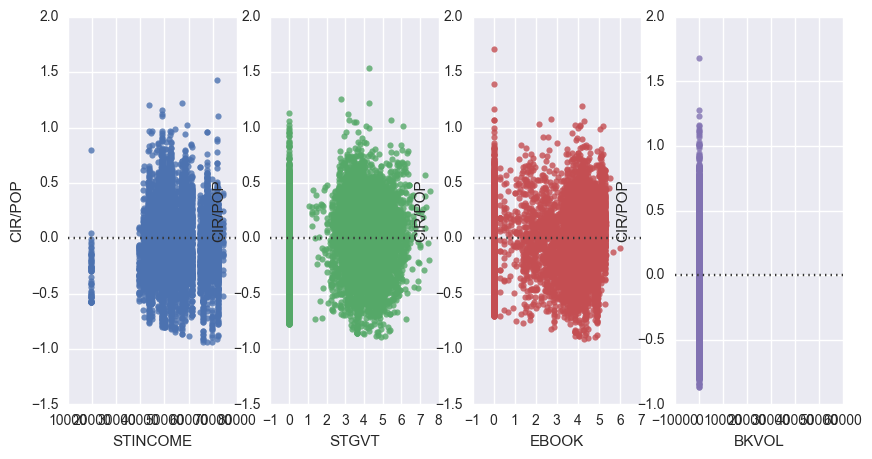

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
for i, col in enumerate(['STINCOME', 'STGVT', 'EBOOK', 'BKVOL']):
    sns.residplot(y='CIR/POP', x=col, data=dummy_df, ax=axes[i])

## Random Forest

In [137]:
from sklearn.ensemble import RandomForestRegressor

maxdepth = np.arange(2, 75, 5)
minsamples = np.arange(10, 50, 10)
randomforest_gs = grid_search.GridSearchCV(
    cv=5,
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': maxdepth, 'min_samples_split': minsamples},
    scoring='mean_squared_error')

randomforest_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([10, 20, 30, 40]), 'max_depth': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [138]:
pprint(randomforest_gs.grid_scores_ )

[mean: -0.07768, std: 0.00339, params: {'min_samples_split': 10, 'max_depth': 2},
 mean: -0.07787, std: 0.00367, params: {'min_samples_split': 20, 'max_depth': 2},
 mean: -0.07772, std: 0.00339, params: {'min_samples_split': 30, 'max_depth': 2},
 mean: -0.07812, std: 0.00350, params: {'min_samples_split': 40, 'max_depth': 2},
 mean: -0.06409, std: 0.00304, params: {'min_samples_split': 10, 'max_depth': 7},
 mean: -0.06406, std: 0.00277, params: {'min_samples_split': 20, 'max_depth': 7},
 mean: -0.06383, std: 0.00298, params: {'min_samples_split': 30, 'max_depth': 7},
 mean: -0.06469, std: 0.00282, params: {'min_samples_split': 40, 'max_depth': 7},
 mean: -0.06224, std: 0.00274, params: {'min_samples_split': 10, 'max_depth': 12},
 mean: -0.06162, std: 0.00330, params: {'min_samples_split': 20, 'max_depth': 12},
 mean: -0.06175, std: 0.00342, params: {'min_samples_split': 30, 'max_depth': 12},
 mean: -0.06147, std: 0.00301, params: {'min_samples_split': 40, 'max_depth': 12},
 mean: -0.06

In [139]:
print randomforest_gs.best_score_
print randomforest_gs.best_estimator_
rfbestmodel=randomforest_gs.best_estimator_

-0.0608346568754
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=47,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [140]:
prediction = rfbestmodel.predict(X_test)

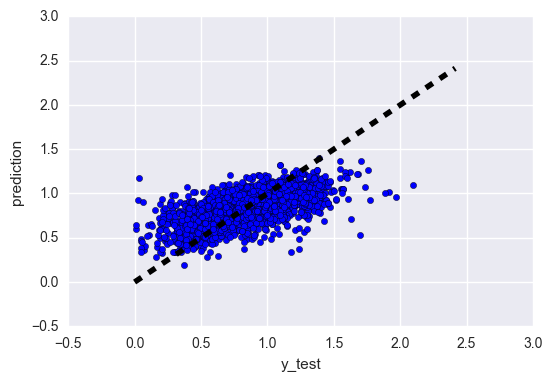

In [141]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y_test')
ax.set_ylabel('prediction')
plt.show()

Prediction: DescribeResult(nobs=1861L, minmax=(0.19266789099727982, 1.4017599495931712), mean=0.85477554783324428, variance=0.033595287600460676, skewness=-0.41534603367750383, kurtosis=0.059030212377578106)
y_test: DescribeResult(nobs=1861L, minmax=(0.0098384532973182469, 2.0958017025375568), mean=0.85214808906249651, variance=0.095416217858548716, skewness=0.01845386289665569, kurtosis=0.02295662443024815)


0.9103459126756841

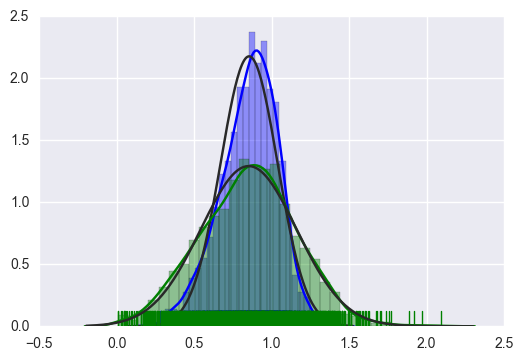

In [142]:
from scipy.stats import norm, normaltest, describe
sns.distplot(prediction, fit=norm, rug=True, color='b');
sns.distplot(y_test, fit=norm, rug=True, color='g');
print "Prediction:", describe(prediction)
stat, p = normaltest(prediction)
p

print "y_test:", describe(y_test)
stat, p = normaltest(y_test)
p

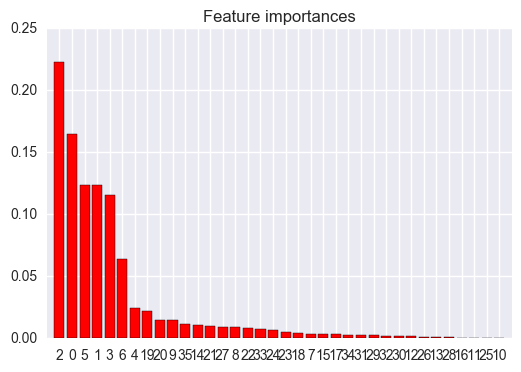

In [143]:
importances = rfbestmodel.feature_importances_
std = np.std([rfbestmodel.feature_importances_ for tree in rfbestmodel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [144]:
features = dummy_df.drop(['TOTCIR', 'POPU_LSA', 'CIR/POP'], axis=1).columns
feature_importances = rfbestmodel.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
2,EBOOK,0.222509
0,STINCOME,0.164920
5,LOCGVT,0.123789
1,BKVOL,0.123227
3,STGVT,0.115214
6,TOTSTAFF,0.064166
4,FEDGVT,0.024548
19,OBEREG_4,0.022051
20,OBEREG_5,0.014901
9,GEOCODE_CO2,0.014386
